El jefe de personal de una agencia gubernamental administró cuatro pruebas de aptitud a cada uno de los 25 aspirantes a cargos administrativos en la agencia. Para el propósito del estudio, se aceptaron a todos los aspirantes para 25 posiciones independiente de sus puntajes en la pruebas. Después de un período de prueba, cada aspirante fue evaluado en su habilidad de trabajo. El puntaje obtenido relativo a la habilidad laboral (Y) y los puntajes en las cuatro pruebas (X1,X2,X3,X4) están consignados en el archivo laboral.csv. Emplee el análisis de regresión lineal múltiple para obtener una ecuación de regresión estimada que sirva para pronosticar la habilidad laboral, dadas las demás variables (Xi).

1. Emplee el análisis de regresión lineal múltiple que explique la habilidad laboral en términos de las variables restantes (actuando como predictoras Xi).

2. Identifique observaciones que puedan considerarse problemáticas (datos atípicos, puntos de balanceo e influyentes) y analice si debe eliminarlas de su conjunto de datos o no, justifique. Repita la construcción del modelo de regresión si eliminó observaciones.

3. Realice la prueba de significancia del modelo, interprete.

4. Obtener el coeficiente de determinación y el coeficiente de determinación ajustado. Interprete.

5. Analice si hay problemas de multicolinealidad.

6. Realice una selección de variables por el método que prefiera, tome decisiones, explique.

7. Realice una predicción utilizando el modelo seleccionado, interprete.

In [1]:
import pandas as pd
from scipy.stats import t, norm, shapiro, levene,pearsonr, normaltest
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from statsmodels.tools.eval_measures import rmse
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.diagnostic import het_breuschpagan
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols

In [2]:
DatosLaboral = pd.read_csv("https://raw.githubusercontent.com/JuanJoseNaranjo/Regresion_lineal_multiple/refs/heads/main/laboral.csv", sep=';')

In [3]:
DatosLaboral

,Y,X1,X2,X3,X4
0,88,86,110,100,87
1,80,62,97,99,100
2,96,110,107,103,103
3,76,101,117,93,95
4,80,100,101,95,88
5,73,78,85,95,84
6,58,120,77,80,74
7,116,105,122,116,102
8,104,112,119,106,105
9,99,120,89,105,97


1. Emplee el análisis de regresión lineal múltiple que explique la habilidad laboral en términos de las variables restantes (actuando como predictoras Xi).

In [4]:
# Dividiendo los datos
x = DatosLaboral.drop(columns='Y')
y = DatosLaboral['Y']


In [5]:
x_train, x_test, y_train, y_test = train_test_split(
                                        x,
                                        y.values.reshape(-1,1),
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )

In [6]:
# Ajuste del modelo utilizando matrices X, y (similar a scikit-learn)
# ==============================================================================
# A la matriz de predictores se le tiene que añadir una columna de 1s
# para el intercept del modelo

x = sm.add_constant(x) # Es el intercepto
modelo = sm.OLS(y,x).fit()
print(modelo.summary())
# x_train = sm.add_constant(x_train, prepend=True).rename(columns={'const':'intercept'})
# modelo = sm.OLS(endog=y_train, exog=x_train).fit()
# print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.963
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     129.7
Date:                Tue, 01 Oct 2024   Prob (F-statistic):           5.26e-14
Time:                        11:35:24   Log-Likelihood:                -67.951
No. Observations:                  25   AIC:                             145.9
Df Residuals:                      20   BIC:                             152.0
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -124.3818      9.941    -12.512      0.0

2. Identifique observaciones que puedan considerarse problemáticas (datos atípicos, puntos de balanceo e influyentes) y analice si debe eliminarlas de su conjunto de datos o no, justifique. Repita la construcción del modelo de regresión si eliminó observaciones.

In [7]:
# Debemos revisar los valores atipicos del modelo, de tal forma que si existen los identificamos y sustraemos para generar el nuevo modelo
# esto lo realizamos con los test Cook, Diffits, hii

#obtener la distancia de Cook para cada observación
influence = modelo.get_influence()
influence_summary = influence.summary_frame()
influence_summary

,dfb_const,dfb_X1,dfb_X2,dfb_X3,dfb_X4,cooks_d,standard_resid,hat_diag,dffits_internal,student_resid,dffits
0,0.103846,-0.189654,0.089298,0.178584,-0.271852,0.050732,1.496313,0.101765,0.503648,1.547623,0.520919
1,0.006218,-0.015830,-0.003065,-0.006414,0.011200,0.000073,0.026037,0.351478,0.019168,0.025378,0.018683
2,0.045091,-0.001547,0.034485,0.146708,-0.265395,0.032440,-1.367190,0.079846,-0.402741,-1.399579,-0.412282
3,-0.384668,0.132049,-0.487684,0.712808,-0.474809,0.130699,-1.628359,0.197726,-0.808390,-1.704107,-0.845994
4,0.004261,0.000044,0.000045,-0.001495,-0.001061,0.000011,0.029456,0.059261,0.007393,0.028711,0.007206
5,0.144791,-0.137587,-0.156522,0.068054,-0.070163,0.017906,0.662564,0.169401,0.299220,0.652994,0.294898
6,0.034469,0.024335,-0.010684,-0.014933,-0.010217,0.000568,0.070186,0.365586,0.053280,0.068418,0.051937
7,0.105739,-0.005965,0.001874,-0.117574,0.068523,0.004646,-0.296148,0.209392,-0.152408,-0.289284,-0.148876
8,0.097749,-0.014304,-0.093148,0.079885,-0.145595,0.016344,-0.897218,0.092159,-0.285865,-0.892649,-0.284409
9,0.138960,-0.212722,0.361760,-0.264581,0.126703,0.048787,-1.064197,0.177219,-0.493895,-1.067928,-0.495627


Pasos para hallar la distancias de Cook

In [8]:
cook = influence.cooks_distance[0]
cook

array([5.07323148e-02, 7.34839933e-05, 3.24401101e-02, 1.30698907e-01,
       1.09315372e-05, 1.79064728e-02, 5.67744254e-04, 4.64564766e-03,
       1.63437734e-02, 4.87865209e-02, 6.54936337e-02, 7.69121767e-03,
       1.85591776e-03, 6.19175868e-02, 2.23960883e-05, 1.91284303e-01,
       1.36902347e-01, 1.36368792e-01, 8.71585465e-03, 3.21726474e-02,
       2.45658918e-03, 2.44039154e-02, 1.51104141e-01, 6.95237582e-03,
       9.53160723e-02])

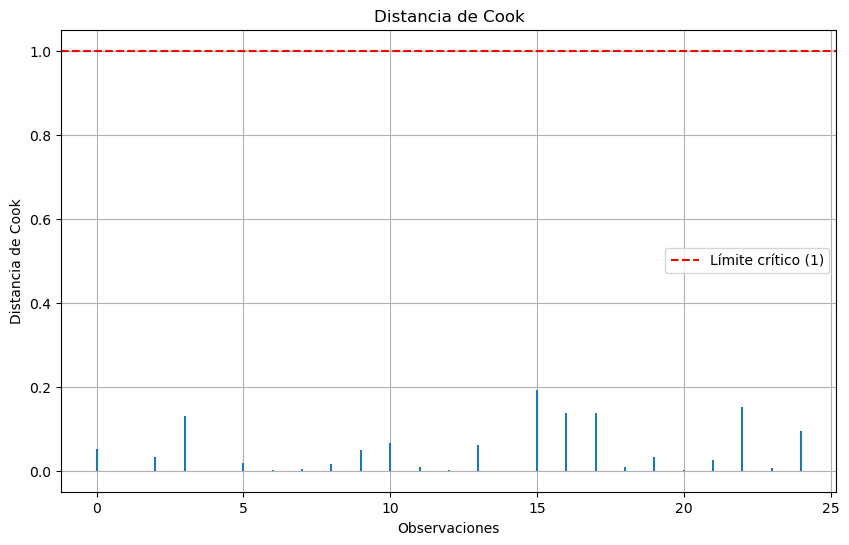

In [9]:
# Graficar la distancia de Cook
plt.figure(figsize=(10, 6))
plt.stem(range(len(cook)), cook, markerfmt=" ", basefmt=" ")
plt.title('Distancia de Cook')
plt.xlabel('Observaciones')
plt.ylabel('Distancia de Cook')
plt.axhline(y=1, color='r', linestyle='--', label='Límite crítico (1)')
plt.legend()
plt.grid()
plt.show()

Punto influyente por distancia de Cook

In [10]:
puntoInfluyenteCook = DatosLaboral[cook > (1) ]
puntoInfluyenteCook

,Y,X1,X2,X3,X4


Puntos de influencia con DFFITS 

In [11]:
dffits = influence.dffits[0] 
dffits

array([ 0.5209186 ,  0.01868317, -0.4122822 , -0.84599441,  0.00720604,
        0.29489758,  0.05193698, -0.14887585, -0.28440938, -0.49562674,
       -0.57988439,  0.19196352, -0.09394217, -0.55555556,  0.0103143 ,
        1.02013436,  0.86668735,  0.83988204, -0.2049741 , -0.40480881,
        0.10810883, -0.34583676,  0.89492038,  0.18245779,  0.70004227])

In [12]:
#Puntos de influencia por DFFITS

puntosInfluenciaDFFITS = DatosLaboral[np.abs(dffits) > 2 * np.sqrt(len(x) * modelo.df_model / modelo.df_resid)]
puntosInfluenciaDFFITS

,Y,X1,X2,X3,X4


Puntos de influencia por DFBETAS

In [13]:
dfbetas = modelo.get_influence().dfbetas
dfbetas

array([[ 1.03846090e-01, -1.89654055e-01,  8.92975188e-02,
         1.78583784e-01, -2.71852269e-01],
       [ 6.21753655e-03, -1.58298007e-02, -3.06549260e-03,
        -6.41366134e-03,  1.11995877e-02],
       [ 4.50910539e-02, -1.54743441e-03,  3.44850694e-02,
         1.46708413e-01, -2.65394894e-01],
       [-3.84668323e-01,  1.32048667e-01, -4.87683565e-01,
         7.12807714e-01, -4.74809458e-01],
       [ 4.26119092e-03,  4.43973125e-05,  4.52363442e-05,
        -1.49483776e-03, -1.06126004e-03],
       [ 1.44791059e-01, -1.37586543e-01, -1.56522091e-01,
         6.80544522e-02, -7.01632265e-02],
       [ 3.44692799e-02,  2.43350860e-02, -1.06842360e-02,
        -1.49326138e-02, -1.02167340e-02],
       [ 1.05739064e-01, -5.96493788e-03,  1.87400971e-03,
        -1.17573858e-01,  6.85225783e-02],
       [ 9.77488936e-02, -1.43039204e-02, -9.31483031e-02,
         7.98852132e-02, -1.45595057e-01],
       [ 1.38959992e-01, -2.12722338e-01,  3.61760207e-01,
        -2.64581090e-01

Hallamos los puntos de influencia de DFBETAS

In [14]:
puntosInfluenciaDFBETAS = np.where(np.abs(dfbetas[:, 0]) > 2 / np.sqrt(len(x)))
DatosLaboral.iloc[puntosInfluenciaDFBETAS]

,Y,X1,X2,X3,X4
10,64,87,81,90,88


Hallamos los residuales estudentizados

In [15]:
residualesEstudentizados = influence.resid_studentized_external
residualesEstudentizados

array([ 1.54762268,  0.02537838, -1.39957856, -1.7041067 ,  0.02871093,
        0.65299423,  0.06841761, -0.28928442, -0.89264909, -1.06792789,
       -1.23988648,  0.40584623, -0.14326001, -0.96896321,  0.02430965,
        1.66187532,  1.71666594,  1.30038655, -0.53086497, -1.17211344,
        0.17459249, -0.77711907,  1.48351219,  0.39198316,  1.2512583 ])

puntos influyentes de residuales estudentizados: []


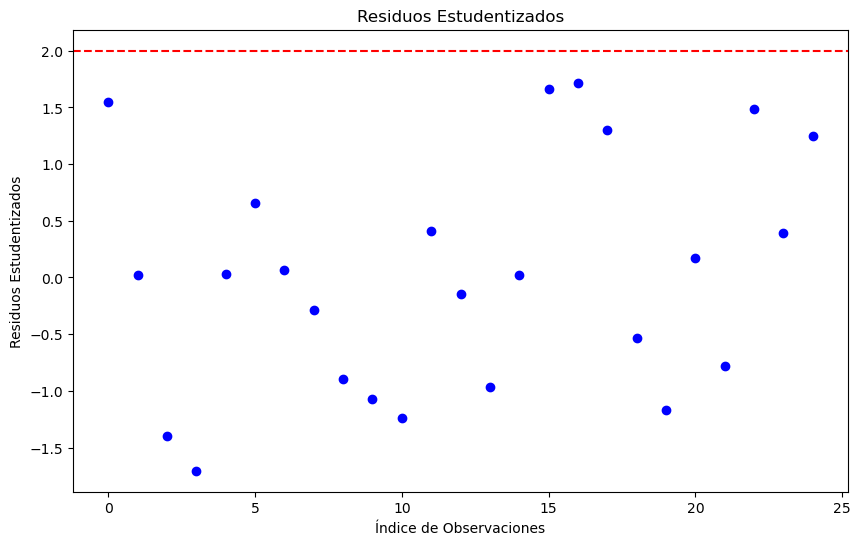

In [16]:

# Establecer un umbral
umbral = 2  # Ajusta según tu criterio

# Identificar puntos influyentes
puntosInfluyentesEstudentizados = np.where(abs(residualesEstudentizados) > umbral)[0]

# Mostrar los índices de puntos influyentes
print("puntos influyentes de residuales estudentizados:", puntosInfluyentesEstudentizados)

# Graficar los residuos estandarizados
plt.figure(figsize=(10, 6))
plt.scatter(np.arange(len(DatosLaboral)), residualesEstudentizados, color='blue')
plt.axhline(y=umbral, color='red', linestyle='--')
plt.title('Residuos Estudentizados')
plt.xlabel('Índice de Observaciones')
plt.ylabel('Residuos Estudentizados')
plt.show()

Puntos de influencia por el método de leverage

In [17]:
leverage = influence.hat_matrix_diag
leverage

array([0.10176523, 0.35147801, 0.07984633, 0.19772613, 0.05926091,
       0.16940073, 0.36558643, 0.20939183, 0.09215868, 0.17721886,
       0.17947732, 0.18282289, 0.30070066, 0.24740212, 0.15255708,
       0.27368129, 0.2031176 , 0.29435811, 0.12974129, 0.10656697,
       0.27715209, 0.16530786, 0.26681045, 0.17808148, 0.23838966])

In [18]:
puntoInfluenciaLeverage = np.where(leverage > np.mean(leverage) + 2 * np.std(leverage))
observacionesInlfuenciableCook = np.where(cook > 4 / len(DatosLaboral))

#Preparar los datos para la graficación
valorx =  np.arange(len(DatosLaboral)) # Indices de las observaciones
valory = y.values   #Extraer valores de la variable dependiente

print(f"Este son mis puntos influenciables de Leverage:   \n{DatosLaboral.iloc[puntoInfluenciaLeverage]}")

print(f"Este son mis puntos influenciables de Cook: \n{DatosLaboral.iloc[observacionesInlfuenciableCook]}")




Este son mis puntos influenciables de Leverage:   
    Y   X1  X2  X3  X4
6  58  120  77  80  74
Este son mis puntos influenciables de Cook: 
      Y   X1   X2   X3   X4
15  109  109  129  102  108


Bajo lo anterior observamos que según los test de observaciones influenciales, los registros de indices 10 y 15 podrían tratarse de datos atipicos, por ende, eliminamos dichos registros de los puntos de datos para usarlos en el modelo

In [19]:
indices_a_eliminar = [15]
DatosLaboral.drop(indices_a_eliminar, inplace=True)
x = DatosLaboral.drop(columns='Y')
y = DatosLaboral['Y']
x = sm.add_constant(x)
modelo = sm.OLS(y,x).fit()
resumen_modelo=modelo.summary()

In [20]:
DatosLaboral

,Y,X1,X2,X3,X4
0,88,86,110,100,87
1,80,62,97,99,100
2,96,110,107,103,103
3,76,101,117,93,95
4,80,100,101,95,88
5,73,78,85,95,84
6,58,120,77,80,74
7,116,105,122,116,102
8,104,112,119,106,105
9,99,120,89,105,97


3. Realice la prueba de significancia del modelo, interprete.
4. Obtener el coeficiente de determinación y el coeficiente de determinación ajustado. Interprete.

In [21]:
print(resumen_modelo)

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.967
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     137.1
Date:                Tue, 01 Oct 2024   Prob (F-statistic):           9.86e-14
Time:                        11:35:25   Log-Likelihood:                -64.094
No. Observations:                  24   AIC:                             138.2
Df Residuals:                      19   BIC:                             144.1
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -124.4310      9.530    -13.056      0.0

### Prueba de significancia de la regresión

#### Primera validación por el f estadístico

Hipotesis nula -> el modelo no tiene significancia

Hipotesis alternativa -> el modelo tiene significancia

Se usa el Prob (F-statistic) para determinar que sería nuestro valor p este queremos que sea menor que nuestro alpha (0.05) ,
entonces como Prob (F-statistic) < alpha lo que podemos concluir es que rechazamos la hipotesis nula por lo tanto el modelo tiene significancia para la representación de los datos.
#### Primera validación por los β coeficiente de determinación

Hipotesis nula -> los coeficientes de la regresión son todos 0  : β1 = β2 = ⋯ = βk = 0

Hipotesis alternativa -> al menos uno de los coeficientes de la regresión es diferente de 0:  βj ≠ 0 para j = 1,2, ... , k

Usando un nivel de confianza del 95% (alpha = 0.05) observamos que X1, X3 y X4 son variables significativas por el rechazo la hipotesis nula de que los coeficientes del modelo de regresion tienen valores de 0, no obstante, el valor p de X2 = 0.775 nos indica bajo ese nivel de confianza que no tiene signifiancia para el modelo

In [22]:
# Correlación lineal entre variables numéricas
# ==============================================================================
corr_matrix = DatosLaboral.corr(method='pearson')
tril = np.tril(np.ones(corr_matrix.shape)).astype(bool)
corr_matrix[tril] = np.nan
corr_matrix_tidy = corr_matrix.stack().reset_index(name='r')
corr_matrix_tidy = corr_matrix_tidy.rename(columns={'level_0': 'variable_1', 'level_1': 'variable_2'})
corr_matrix_tidy = corr_matrix_tidy.dropna()
corr_matrix_tidy['r_abs'] = corr_matrix_tidy['r'].abs()
corr_matrix_tidy = corr_matrix_tidy.sort_values('r_abs', ascending=False).reset_index(drop=True)
corr_matrix_tidy

,variable_1,variable_2,r,r_abs
0,Y,X3,0.907183,0.907183
1,Y,X4,0.866003,0.866003
2,X3,X4,0.802596,0.802596
3,X2,X3,0.531163,0.531163
4,Y,X1,0.513227,0.513227
5,Y,X2,0.473479,0.473479
6,X2,X4,0.351477,0.351477
7,X1,X4,0.323250,0.323250
8,X1,X3,0.179507,0.179507
9,X1,X2,0.090186,0.090186


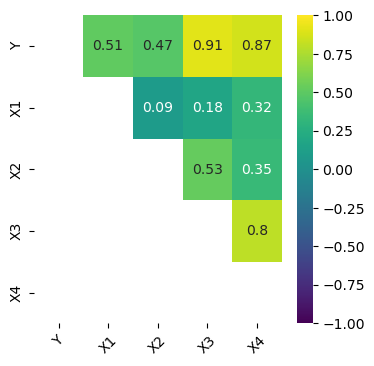

In [23]:
# Heatmap matriz de correlaciones
# ==============================================================================
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(4, 4))
sns.heatmap(
    corr_matrix,
    annot     = True,
    cbar      = True,
    annot_kws = {"size": 10},
    vmin      = -1,
    vmax      = 1,
    center    = 0,
    cmap      = "viridis",
    square    = False,
    ax        = ax
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 45
)
ax.tick_params(labelsize = 10)

### Significancia de acuerdo a la matriz de correlación
De acuerdo a nuestra matriz de correlación y al gráfico heatmap podemos concluir que la variable x2 no tiene una correlación alta con nuestra variable predictora Y, esto nos puede indicar que x2 no tenga significancia en el modelo

5. Analice si hay problemas de multicolinealidad.

In [24]:
# Multicolinealidad (Inflación de varianza VIF)
# Correlación entre predictores numéricos
# ==============================================================================
corr_matrix = x.corr(method='pearson')
tril = np.tril(np.ones(corr_matrix.shape)).astype(bool)
corr_matrix[tril] = np.nan
corr_matrix_tidy = corr_matrix.stack().reset_index(name='r')
corr_matrix_tidy = corr_matrix_tidy.rename(columns={'level_0': 'variable_1', 'level_1': 'variable_2'})
corr_matrix_tidy = corr_matrix_tidy.dropna()
corr_matrix_tidy['r_abs'] = corr_matrix_tidy['r'].abs()
corr_matrix_tidy = corr_matrix_tidy.sort_values('r_abs', ascending=False).reset_index(drop=True)
corr_matrix_tidy

,variable_1,variable_2,r,r_abs
0,X3,X4,0.802596,0.802596
1,X2,X3,0.531163,0.531163
2,X2,X4,0.351477,0.351477
3,X1,X4,0.323250,0.323250
4,X1,X3,0.179507,0.179507
5,X1,X2,0.090186,0.090186


 ### Analisis de Valores propios (X^T X)


In [34]:

xtx=np.dot(x.T,x) # Caculamos la matriz Trasnpuesta de X
valores_propios,_ =np.linalg.eig(xtx) #Obtenemos  los valores propios con linalg.eig

lambda_max=np.max(valores_propios) #Calcular Valor Propio máximo

indice_condicion= np.sqrt(lambda_max/valores_propios) # Calculamos el indice de condicion 


#Resultados:
print('\nValores Propios (λ_j):')
print(valores_propios)
print('-------------------------------------------------------------------------------------------------------')
print('\nValor Propio Máximo (λmáx):')
print(lambda_max)
print('-------------------------------------------------------------------------------------------------------')
print('\nÍndices de Condición (√κ_j):')
print(indice_condicion)
print('-------------------------------------------------------------------------------------------------------')

#Interpretacion:

for j,indice in enumerate(indice_condicion): # Recorremos el indice para obtener tanto su  valor e indice
    print(f"\nÍndice de Condición para λ_{j+1}: √κ_{j+1} = {indice}")
    if indice < 10:
        print("No hay problemas de multicolinealidad.")
        print('-------------------------------------------------------------------------------------------------------')
    elif 10 <= indice < 30:
        print("Multicolinealidad moderada.")
        print('-------------------------------------------------------------------------------------------------------')
    else:
        print(" Multicolinealidad Severa.")
        print('-------------------------------------------------------------------------------------------------------')



Valores Propios (λ_j):
[7.19185042e+05 6.12806488e+03 1.70031021e-01 4.72723059e+02]
-------------------------------------------------------------------------------------------------------

Valor Propio Máximo (λmáx):
719185.0420286055
-------------------------------------------------------------------------------------------------------

Índices de Condición (√κ_j):
[1.00000000e+00 1.08332470e+01 2.05663036e+03 3.90046989e+01]
-------------------------------------------------------------------------------------------------------

Índice de Condición para λ_1: √κ_1 = 1.0
No hay problemas de multicolinealidad.
-------------------------------------------------------------------------------------------------------

Índice de Condición para λ_2: √κ_2 = 10.833247010458832
Multicolinealidad moderada.
-------------------------------------------------------------------------------------------------------

Índice de Condición para λ_3: √κ_3 = 2056.6303555946374
 Multicolinealidad Severa.
-----

#### Interpretacion:
Se observa que el primer valor propio no presenta multicolinealidad, lo que indica que la primera dirección de varianza en los datos es independiente. En contraste, el segundo valor propio muestra una colinealidad moderada. En cuanto a los valores restantes, se evidencia una multicolinealidad severa, lo que podría dificultar la interpretación de los coeficientes de determinación en la regresión.

In [25]:
# Cálculo del VIF
# ==============================================================================
vif = pd.DataFrame()
vif["variables"] = x.columns
vif["VIF"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif

#VIF son factores de inflación de varianza, podemos medir multicolinealidad con ellos según las reglas VIF

,variables,VIF
0,const,141.189003
1,X1,1.141490
2,X2,1.426688
3,X3,3.583453
4,X4,3.173975


6. Realice una selección de variables por el método que prefiera, tome decisiones, explique.

Para la selección de variables podemos usar el método Forward o selección hacia adelante usando diferentes métricas para su evaluación:

In [26]:
def forward_selection(
    X: pd.DataFrame,
    y: pd.Series,
    criterio: str='aic',
    add_constant: bool=True,
    verbose: bool=True
)-> list:

    """
    Realiza un procedimiento de selección de variables hacia adelante (forward)
    utilizando como criterio de bondad la métrica especificada. El procedimiento
    se detiene cuando no es posible mejorar más el modelo añadiendo variables.

    Parameters
    ----------
    X: pd.DataFrame
        Matriz de predictores
    y: pd.Series
        Variable respuesta
    criterio: str, default='aic'
        Métrica utilizada para seleccionar las variables. Debe ser una de las
        siguientes opciones: 'aic', 'bic', 'rsquared_adj', 'cp_mallows'.
    add_constant: bool, default=True
        Si `True` añade una columna de 1s a la matriz de predictores con el
        con el nombre de intercept.
    verbose: bool, default=True
        Si `True` muestra por pantalla los resultados de cada iteración.

    Returns
    -------
    seleccion: list
        Lista con las variables seleccionadas.
    """

    if add_constant:
        X = sm.add_constant(X, prepend=True).rename(columns={'const':'intercept'})

    restantes = X.columns.to_list()
    seleccion = []
    if criterio == 'rsquared_adj':
        mejor_metrica = -np.inf
        ultima_metrica = -np.inf
    else:
        mejor_metrica = np.inf
        ultima_metrica = np.inf

    while restantes:
        metricas = []
        for candidata in restantes:
            seleccion_temp = seleccion + [candidata]
            modelo  = sm.OLS(endog=y, exog=X[seleccion_temp])
            modelo_res = modelo.fit()

            # Calcular la métrica correspondiente
            if criterio == 'cp_mallows':
                p = len(seleccion_temp)  # Número de parámetros (incluye intercepto)
                rss = np.sum(modelo_res.resid ** 2)  # Suma de residuos al cuadrado (RSS)
                sigma2 = rss / (len(y) - p)  # Estimación de la varianza residual
                metrica = (rss / sigma2) - (len(y) - 2 * p)  # Cp de Mallows
            else:
                metrica = getattr(modelo_res, criterio)
            
            metricas.append(metrica)

        # Selección de la mejor métrica
        if criterio == 'rsquared_adj':
            mejor_metrica = max(metricas)
            if mejor_metrica > ultima_metrica:
                mejor_variable = restantes[np.argmax(metricas)]
            else:
                break
        else:
            mejor_metrica = min(metricas)
            if mejor_metrica < ultima_metrica:
                mejor_variable = restantes[np.argmin(metricas)]
            else:
                break

        seleccion.append(mejor_variable)
        restantes.remove(mejor_variable)
        ultima_metrica = mejor_metrica

        if verbose:
            print(f'variables: {seleccion} | {criterio}: {mejor_metrica:.3f}')

    return sorted(seleccion)


El método Akaike (AIC) es una métrica ampliamente utilizada para la selección de modelos. Es especialmente útil cuando se quiere elegir el modelo que mejor se ajusta a los datos, pero sin sobreajustar, penalizando la complejidad del modelo.

El AIC tiene un enfoque basado en el principio de parsimonia. Modelos con más parámetros tienden a ajustarse mejor a los datos (menor error de entrenamiento), pero también pueden sobreajustarse. El AIC equilibra el ajuste con la penalización por complejidad, lo que hace que sea ideal cuando hay riesgo de sobreajuste.

El AIC mide la calidad de un modelo en términos de la bondad de ajuste y la simplicidad.

AIC=2k−2ln(L)



In [27]:
# Selección de variables hacia forward
# ==============================================================================
predictores = forward_selection(
    X            = x,
    y            = y,
    criterio     = 'aic',
    add_constant = False, # Ya se le añadió anteriormente
    verbose      = True
)
predictores

variables: ['X4'] | aic: 187.534
variables: ['X4', 'const'] | aic: 180.439
variables: ['X4', 'const', 'X3'] | aic: 165.525
variables: ['X4', 'const', 'X3', 'X1'] | aic: 136.294


['X1', 'X3', 'X4', 'const']

Para comparar con otra métrica usamos Cp Mallows

In [28]:
# Selección de variables hacia forward
# ==============================================================================
predictores = forward_selection(
    X            = x,
    y            = y,
    criterio     = 'cp_mallows',
    add_constant = False, # Ya se le añadió anteriormente
    verbose      = True
)
predictores

variables: ['X4'] | cp_mallows: 1.000


['X4']

Cuando el modelo se evalua con esta métrica se sobreajusta con el comportamiento de la variable X4, por ende, usamos el modelo de variables explicado por AIC.

In [29]:
# Según la prueba de significancia y la matriz de correlación deberiamos seleccionar las variables X1, X3 y X4 para nuestro modelo

columnas_a_eliminar = ['X2']
DatosLaboral.drop(columnas_a_eliminar, axis = 1, inplace=True)
x = DatosLaboral.drop(columns='Y')
y = DatosLaboral['Y']
x = sm.add_constant(x)
modelo = sm.OLS(y,x).fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.966
Model:                            OLS   Adj. R-squared:                  0.961
Method:                 Least Squares   F-statistic:                     191.5
Date:                Tue, 01 Oct 2024   Prob (F-statistic):           6.75e-15
Time:                        11:35:26   Log-Likelihood:                -64.147
No. Observations:                  24   AIC:                             136.3
Df Residuals:                      20   BIC:                             141.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -124.3779      9.308    -13.363      0.0

7. Realice una predicción utilizando el modelo seleccionado, interprete.

Predicciones

In [30]:
#Como el profesor menciona que se debe hacer:
nuevoRegistro = [1.0,50,130,100]

modelo.predict(nuevoRegistro)


array([120.10424612])

In [31]:
# Prediciones del conjunto de test
# ==============================================================================
modelo.predict(x)

0      82.261020
1      79.027807
2     100.541991
3      80.050980
4      79.696782
5      71.378524
6      58.232989
7     117.357884
8     106.310228
9     103.927474
10     68.563432
11    124.000410
12     93.631692
13     74.998537
14    110.502645
16     93.985845
17    121.319251
18    100.773774
19     86.572465
20     64.823065
21    112.177002
22     74.664783
23    113.434658
24     77.766763
dtype: float64

In [32]:
# Predicciones con intervalo de confianza
# ==============================================================================
# La columna mean contiene la media de la predicción
predicciones = modelo.get_prediction(exog = x).summary_frame(alpha=0.05)
predicciones

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,82.261020,1.214253,79.728133,84.793906,73.863519,90.658521
1,79.027807,2.334999,74.157084,83.898531,69.656230,88.399385
2,100.541991,1.182713,98.074896,103.009086,92.164099,108.919883
3,80.050980,1.495748,76.930904,83.171057,71.458112,88.643849
4,79.696782,0.939142,77.737767,81.655797,71.454194,87.939369
5,71.378524,1.339694,68.583971,74.173078,62.898427,79.858621
6,58.232989,2.271146,53.495463,62.970516,48.929943,67.536036
7,117.357884,1.761434,113.683597,121.032170,108.548633,126.167134
8,106.310228,1.186989,103.834212,108.786243,97.929705,114.690751
9,103.927474,1.105796,101.620823,106.234124,95.595418,112.259529


In [33]:
# Error de test del modelo
# ==============================================================================
error = rmse(y, predicciones['mean'])
print(f"El error (rmse) de test es: {error}")

El error (rmse) de test es: 3.503807289838936


### Validando los supuestos del modelo de regresion lineal

### Aleatoriedad

Dado que no se logra observar un patrón de comportamiento dentro de la gráfica de residuales, se puede concluir gráficamente que los residuos presentan una aleatoriedad para cumplir con el supuesto de aleatoriedad.

### Normalidad

Dado que el test de Shapiro en los residuales muestra un valor p < alpha bajo la evidencia estadistica, se puede concluir que las variables no se distribuyen de una forma normal bajo un 95% de confianza

### Linealidad

Adicionalmente, como la gráfica no presenta un comportamiento circular y los valores en mayor proporción se encuentran entre los residuos de 1 y -1 podemos concluir gráficamente que los residuos presentan linealidad para cumplir con el supuesto de linealidad.

### Varianza

Como valor p del test númerico de Levene < alpha = 0.05 según la evidencia estadistica, rechazamos H0 a favor de la alternativa, por ello se puede concluir que la varianza no es constante con un 95% de confianza

### Conclusión
Se observa una relación positiva inicial entre la inversión en marketing y las ventas, lo que sugiere un vínculo directo. Sin embargo, el modelo podría estar dejando de lado componentes no lineales. El coeficiente de determinación (R²) revela que una parte significativa de la variabilidad en las ventas no está completamente explicada solo por la inversión en marketing. Al validar los supuestos de la regresión lineal, se concluye que, aunque existe una correlación moderada de 0.5580 entre las variables, no es apropiado modelarlas a través de una regresión lineal. Esto se debe a que, aunque se cumple el supuesto de aleatoriedad y linealidad, se violan los supuestos de normalidad y homocedasticidad (varianza constante), lo que genera que el coeficiente de regresión se vea afectado mostrando la linealidad moderada.